In [3]:
import pandas as pd

In [4]:
insurance = pd.read_csv('C://Users/kiimi/Downloads/Medical Cost Dataset/insurance.csv')

In [50]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.shape #Nrows = 1338

(1338, 7)

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [7]:
insurance['sex'] =  ohe.fit_transform(insurance[['sex']])

In [8]:
insurance['smoker'] = ohe.fit_transform(insurance[['smoker']])

In [9]:
insurance['region'] = ohe.fit_transform(insurance[['region']])

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,0.0,16884.92400
1,18,0.0,33.770,1,1.0,0.0,1725.55230
2,28,0.0,33.000,3,1.0,0.0,4449.46200
3,33,0.0,22.705,0,1.0,0.0,21984.47061
4,32,0.0,28.880,0,1.0,0.0,3866.85520


In [67]:
import seaborn as sns

%matplotlib inline


C:\Users\kiimi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


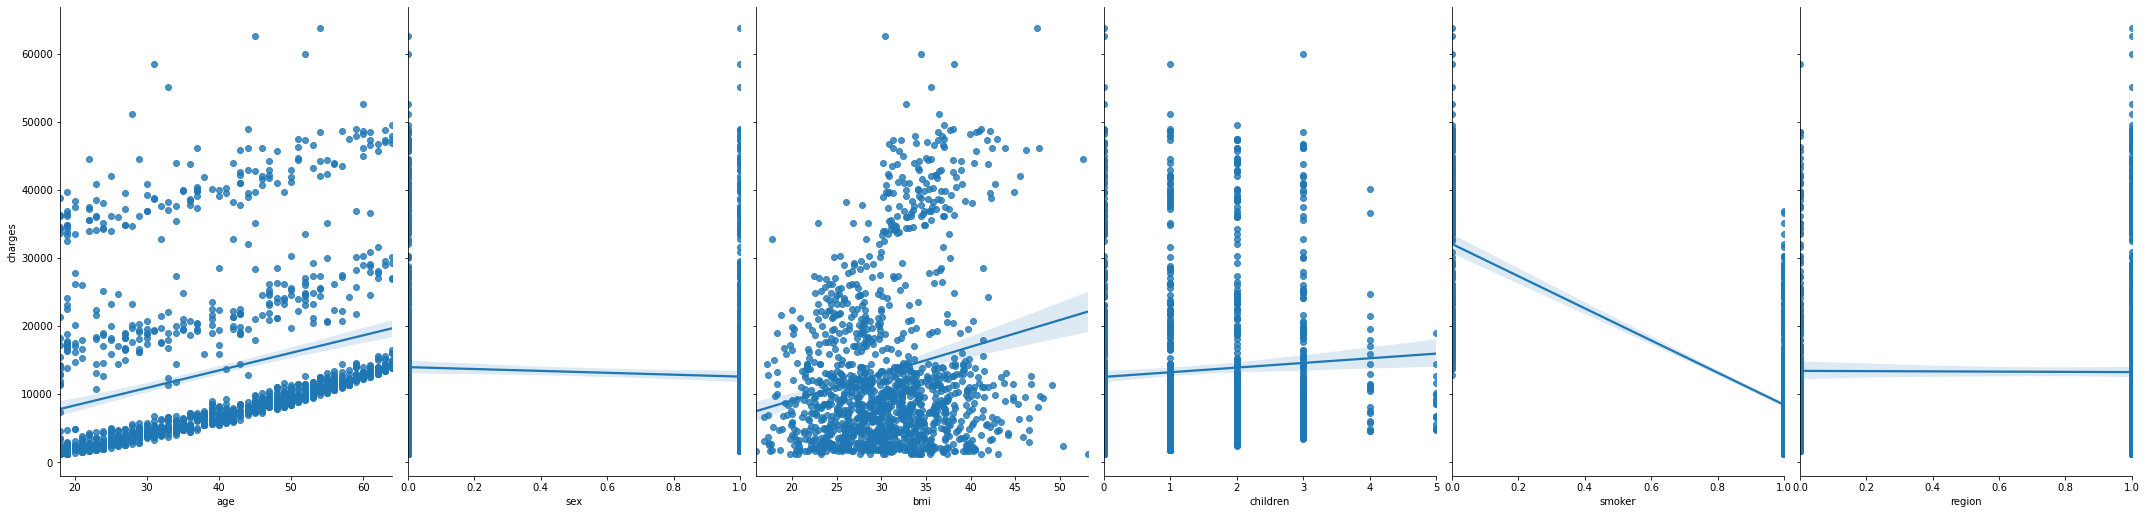

In [68]:
sns.pairplot(insurance, x_vars=['age','sex','bmi','children','smoker','region'], y_vars='charges', size=7, aspect=0.7, kind='reg')

In [10]:
columns = ['age','sex','bmi','children','smoker','region']

X = insurance[columns]

In [11]:
y = insurance['charges']

In [12]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [55]:
y.shape

(1338,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [14]:
X_train.shape

(1003, 6)

In [38]:
X.head()

,age,sex,bmi,children,smoker
0,19,1.0,27.900,0,0.0
1,18,0.0,33.770,1,1.0
2,28,0.0,33.000,3,1.0
3,33,0.0,22.705,0,1.0
4,32,0.0,28.880,0,1.0


In [24]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1.0,27.900,0,0.0,southwest
1,18,0.0,33.770,1,1.0,southeast
2,28,0.0,33.000,3,1.0,southeast
3,33,0.0,22.705,0,1.0,northwest
4,32,0.0,28.880,0,1.0,northwest


In [27]:
ohe.fit_transform(insurance[['region']])

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [26]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1.0,27.900,0,0.0,0.0
1,18,0.0,33.770,1,1.0,0.0
2,28,0.0,33.000,3,1.0,0.0
3,33,0.0,22.705,0,1.0,0.0
4,32,0.0,28.880,0,1.0,0.0


In [19]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = linreg.predict(X_test)

In [23]:
from sklearn import metrics
import numpy as np

In [87]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

11361.210340078673


In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
y_pred = model.predict(X_test)

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6527.950579773935
